In [ ]:
!pip install geopandas
!pip install shapely

In [ ]:
!pip install contextily

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx 
import numpy as np 

In [ ]:
data=gpd.read_file('/content/hillsborough_fl_2010_tracts_formatted.geojson')
data.head()

,census_tract_GEOID,geometry
0,12057006900,"POLYGON ((-82.50651 27.87912, -82.50648 27.877..."
1,12057010214,"POLYGON ((-82.29064 28.12917, -82.28969 28.129..."
2,12057011518,"POLYGON ((-82.64091 28.11842, -82.64089 28.116..."
3,12057013920,"POLYGON ((-82.26150 27.76278, -82.26116 27.762..."
4,12057010305,"POLYGON ((-82.35768 27.99625, -82.35773 27.995..."


In [ ]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
geom = data.geometry

In [ ]:
type(geom[0])

shapely.geometry.polygon.Polygon

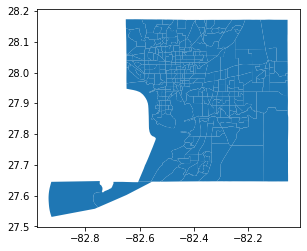

In [ ]:
data.plot()

In [ ]:
hills_data = pd.read_csv('/content/hillsborough_fl_processed_2017_to_2019_20210916.csv')

In [ ]:
hills_data.head(2)

,census_tract_GEOID,total-households,total-renter-occupied-households,total-owner-occupied-households,total-owner-occupied-households-mortgage,median-gross-rent,median-household-income,median-property-value,median-monthly-housing-cost,pct-white,pct-af-am,pct-hispanic,pct-am-indian,pct-asian,pct-nh-pi,pct-multiple,pct-other,pct-below-poverty-level,households-children,single-parent-household,older-adult-alone,level-of-education,immigrant-status,english-fluency,drive-to-work,public-transport-to-work,vacant-properties,live-in-mobile-home,pct-renter-occupied,pct-owner-occupied,pct-owner-occupied-mortgage,pct-owner-occupied-without-mortgage,median-house-age,pct-non-white,pct-without-health-insurance,total-evictions,avg-evictions,total-foreclosure-sales,avg-foreclosure-sales,total-lien-foreclosures,avg-lien-foreclosures,total-evictions-2017,eviction-filings-2017,eviction-rate-2017,total-evictions-2018,eviction-filings-2018,eviction-rate-2018,total-evictions-2019,eviction-filings-2019,eviction-rate-2019,foreclosure-sales-2017,foreclosure-sales-2018,foreclosure-sales-2019,lien-foreclosures-2017,lien-foreclosures-2018,lien-foreclosures-2019,avg-foreclosure-rate,foreclosure-rate-2017,foreclosure-rate-2018,foreclosure-rate-2019,avg-lien-foreclosure-rate,lien-foreclosure-rate-2017,lien-foreclosure-rate-2018,lien-foreclosure-rate-2019,avg-eviction-rate,ratio-to-mean-foreclosure-rate,ratio-to-mean-eviction-rate,avg-housing-loss-rate,evictions-pct-total-housing-loss,housing-loss-index,county_GEOID,county,state
0,12057000401,926,338,588,432,1055,48426,148200,1172,669,155,207,0,15,27,52,8,-888888888,124,21,172,137,78,1805,996,106,48,20,36.501080,63.498920,46.652268,16.846652,55,-569,12.961567,49.479798,16.493266,6.0,2.000000,NaN,NaN,19.893939,39.0,0.510101,12.752525,25.0,0.510101,16.833333,33.0,0.510101,4.0,1.0,1.0,NaN,NaN,NaN,0.462963,0.925926,0.231481,0.231481,NaN,NaN,NaN,NaN,4.879664,0.655993,2.15413,2.401723,0.891853,1.583222,12057,Hillsborough County,Florida
1,12057010105,1496,381,1115,653,879,53860,232000,1549,1431,8,242,18,15,0,0,24,-888888888,325,19,206,143,322,3130,1414,0,146,658,25.467914,74.532086,43.649733,30.882353,33,-1331,13.405495,18.428571,6.142857,14.0,4.666667,1.0,1.0,9.428571,22.0,0.428571,3.000000,7.0,0.428571,6.000000,14.0,0.428571,5.0,6.0,3.0,0.0,1.0,0.0,0.714650,0.765697,0.918836,0.459418,0.089686,0.0,0.089686,0.0,1.612298,1.012621,0.71175,1.045408,0.568282,0.689136,12057,Hillsborough County,Florida


In [ ]:
df_3857 = data.to_crs(epsg=3857)

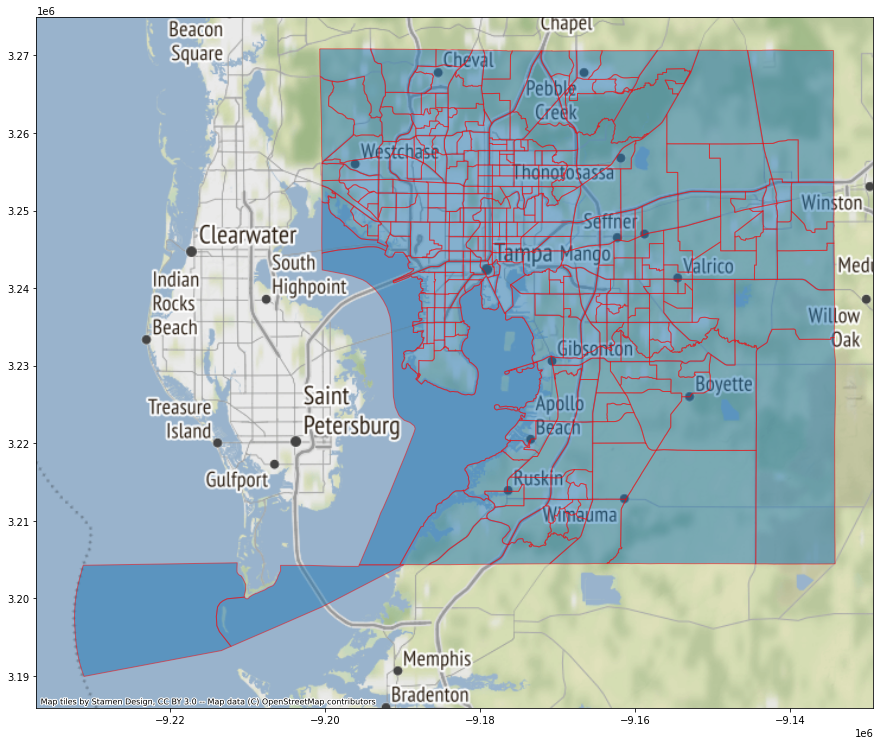

In [ ]:
ax=df_3857.plot(figsize=(15, 15), alpha=0.5, edgecolor='r')
ctx.add_basemap(ax)

In [ ]:
hills_data=hills_data.astype({'census_tract_GEOID': 'int64'})
df_3857=df_3857.astype({'census_tract_GEOID':'int64'})

In [ ]:
#join hill_data by geoid and color individual polys according to a value<-->color map. just divide by 10 bins for now 
shape_geoid = df_3857.census_tract_GEOID
data_geoid = hills_data.census_tract_GEOID
len(shape_geoid), len(data_geoid), "\n", shape_geoid.head(), "\n",  data_geoid.head()

(321, 321, '\n', 0    12057006900
 1    12057010214
 2    12057011518
 3    12057013920
 4    12057010305
 Name: census_tract_GEOID, dtype: int64, '\n', 0    12057000401
 1    12057010105
 2    12057010203
 3    12057010600
 4    12057002300
 Name: census_tract_GEOID, dtype: int64)

In [ ]:
from collections import Counter

c1=Counter(shape_geoid)
c1.most_common(2)
c2=Counter(data_geoid)
c2.most_common(2)

c1.subtract(c2)
c1.most_common(1)

[(12057006900, 0)]

In [ ]:
geo_joined_df = pd.merge(df_3857, hills_data, how='inner', left_on='census_tract_GEOID', right_on='census_tract_GEOID', validate='1:1')

In [ ]:
geo_joined_df.head()

,census_tract_GEOID,geometry,total-households,total-renter-occupied-households,total-owner-occupied-households,total-owner-occupied-households-mortgage,median-gross-rent,median-household-income,median-property-value,median-monthly-housing-cost,pct-white,pct-af-am,pct-hispanic,pct-am-indian,pct-asian,pct-nh-pi,pct-multiple,pct-other,pct-below-poverty-level,households-children,single-parent-household,older-adult-alone,level-of-education,immigrant-status,english-fluency,drive-to-work,public-transport-to-work,vacant-properties,live-in-mobile-home,pct-renter-occupied,pct-owner-occupied,pct-owner-occupied-mortgage,pct-owner-occupied-without-mortgage,median-house-age,pct-non-white,pct-without-health-insurance,total-evictions,avg-evictions,total-foreclosure-sales,avg-foreclosure-sales,total-lien-foreclosures,avg-lien-foreclosures,total-evictions-2017,eviction-filings-2017,eviction-rate-2017,total-evictions-2018,eviction-filings-2018,eviction-rate-2018,total-evictions-2019,eviction-filings-2019,eviction-rate-2019,foreclosure-sales-2017,foreclosure-sales-2018,foreclosure-sales-2019,lien-foreclosures-2017,lien-foreclosures-2018,lien-foreclosures-2019,avg-foreclosure-rate,foreclosure-rate-2017,foreclosure-rate-2018,foreclosure-rate-2019,avg-lien-foreclosure-rate,lien-foreclosure-rate-2017,lien-foreclosure-rate-2018,lien-foreclosure-rate-2019,avg-eviction-rate,ratio-to-mean-foreclosure-rate,ratio-to-mean-eviction-rate,avg-housing-loss-rate,evictions-pct-total-housing-loss,housing-loss-index,county_GEOID,county,state
0,12057006900,"POLYGON ((-9184582.680 3233741.992, -9184579.5...",2458,679,1779,1077,1237,71310,257200,1943,2126,171,297,0,73,0,53,35,-888888888,462,110,396,340,614,4615,2616,78,215,191,27.624085,72.375915,43.816111,28.559805,32,-2026,9.349252,43.200000,14.400000,15.0,5.000000,3.0,1.5,12.960000,24.0,0.540000,13.500000,25.0,0.540000,16.740000,31.0,0.540000,4.0,4.0,7.0,2.0,1.0,0.0,0.464253,0.371402,0.371402,0.649954,0.084317,0.112423,0.056211,0.000000,2.120766,0.657821,0.936213,1.104784,0.742268,0.728276,12057,Hillsborough County,Florida
1,12057010214,"POLYGON ((-9160551.808 3265268.827, -9160446.8...",116,8,108,29,-666666666,41875,128100,985,99,0,21,0,4,0,13,0,-888888888,8,8,30,5,22,209,68,0,14,61,6.896552,93.103448,25.000000,68.103448,32,1,7.630522,2.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,0.666667,1.0,0.666667,1.333333,2.0,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.500000,NaN,5.518132,NaN,NaN,NaN,12057,Hillsborough County,Florida
2,12057011518,"POLYGON ((-9199543.909 3263912.441, -9199541.5...",1523,101,1422,998,-666666666,110737,415000,2358,1390,62,147,0,45,0,17,9,-888888888,404,26,180,188,369,3461,1642,0,58,75,6.631648,93.368352,65.528562,27.839790,28,-1290,5.280000,4.307692,1.435897,17.0,5.666667,4.0,2.0,2.461538,4.0,0.615385,0.615385,1.0,0.615385,1.230769,2.0,0.615385,6.0,7.0,4.0,0.0,3.0,1.0,0.567802,0.601202,0.701403,0.400802,0.140647,0.000000,0.210970,0.070323,1.421681,0.804545,0.627602,0.646275,0.202166,0.426026,12057,Hillsborough County,Florida
3,12057013920,"POLYGON ((-9157308.514 3219099.065, -9157270.3...",1293,257,1036,636,1319,76466,272000,1893,1071,68,182,12,45,0,8,89,-888888888,310,39,108,254,177,3021,1643,0,168,156,19.876257,80.123743,49.187935,30.935808,26,-971,7.591425,4.000000,2.000000,11.0,3.666667,2.0,1.0,3.000000,12.0,0.250000,1.000000,4.0,0.250000,0.000000,0.0,0.000000,5.0,2.0,4.0,1.0,1.0,0.0,0.576520,0.786164,0.314465,0.628931,0.096525,0.096525,0.096525,0.000000,0.778210,0.816898,0.343541,0.634565,0.352941,0.418307,12057,Hillsborough County,Florida
4,12057010305,"POLYGON ((-9168014.778 3248500.504, -9168020.9...",1278,459,819,473,1067,46458,250900,1591,896,295,138,0,33,0,48,6,-888888888,168,50,151,203,352,3281,1209,0,188,645,35.915493,64.084507,37.010955,27.073552,28,-796,17.850910,59.664634,19.888211,9.0,3.000000,NaN,NaN,20.274390,35.0,0.579268,17.957317,31.0,0.579268,21.432927,37.0,0.579268,2.0,5.0,2.0,NaN,NaN,NaN,0.634249,0.422833,1.057082,0.422833,NaN,NaN,NaN,N

In [ ]:
type(df_3857), type(geo_joined_df), geo_joined_df['median-property-value'].dtype

(geopandas.geodataframe.GeoDataFrame,
 geopandas.geodataframe.GeoDataFrame,
 dtype('int64'))

In [ ]:
!pip install mapclassify>=2.2.0

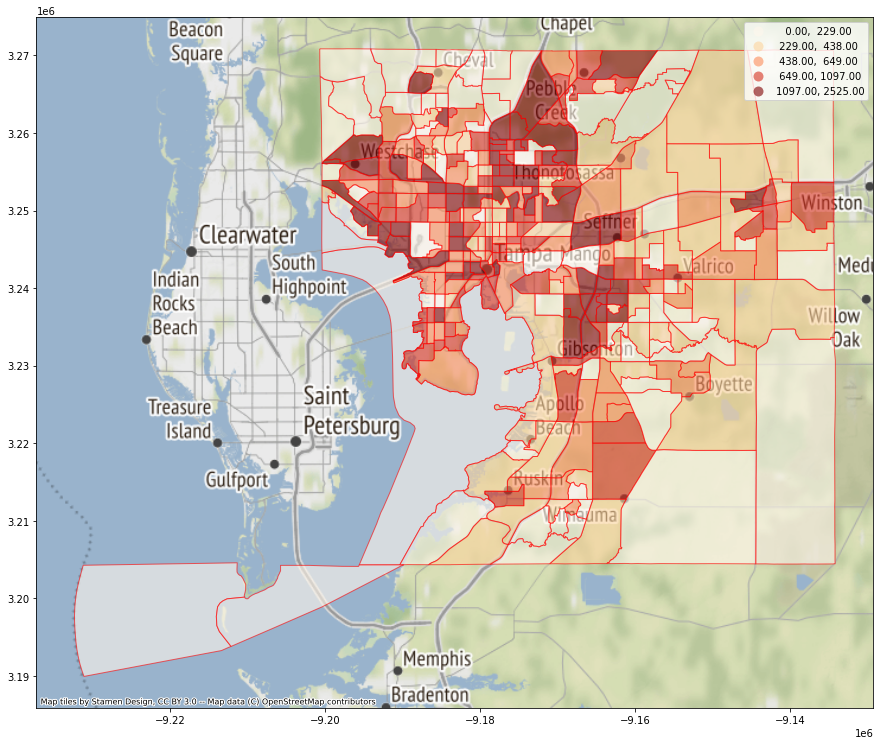

In [ ]:
ax2=geo_joined_df.plot(\
  column='total-renter-occupied-households',\
  figsize=(15, 15),\
  alpha=0.6,\
  edgecolor='r',\
   cmap='OrRd',\
  scheme='quantiles',
  legend = True,\
)
ctx.add_basemap(ax2)

(array([9.37960606e-07, 4.06449596e-06, 4.37714949e-06, 1.92058600e-06,
        1.16128456e-06, 3.57318326e-07, 2.67988744e-07, 8.93295815e-08,
        4.46647907e-08, 1.78659163e-07]),
 array([ 19900.,  94530., 169160., 243790., 318420., 393050., 467680.,
        542310., 616940., 691570., 766200.]),
 <a list of 10 Patch objects>)

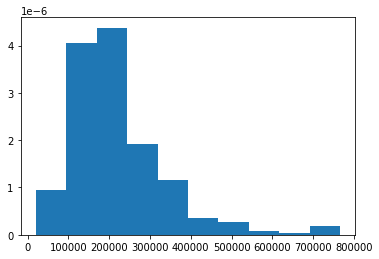

In [ ]:
%matplotlib inline

col = geo_joined_df[geo_joined_df['median-property-value']>0]['median-property-value'] #ignore -666666
plt.hist(col, density=True, bins=10)  # density=False would make counts